# Fall 2020: DS-GA 1011 NLP with Representation Learning
## Lab 4: 25-Sep-2020, Friday
## Constituency Parsing
In this lab, we will familiarize ourselves with constituency parsing grammars.

---
### Definitions

**Syntax** refers to the way for ordering words to form phrases and sentences in a language.

**Grammar** defines the rules for forming these phrases and sentences through combination of lexical units. A declarative specification of well-formedness.

**Parsing** assigns the *syntactic* structural description (usually in the form of a tree) to a string of words, in accordance with a *grammar*. A procedural interpretation of the *grammar*. Useful for natural language understanding/processing applications like information extraction, machine translation and even psycholinguistics amongst others.

**Constituency Parsing** breaks down a string of words into its *constituents*.

**Constituent** is a group of words behaving as a single unit. [Penn Treebank II Constituent Tags](http://www.surdeanu.info/mihai/teaching/ista555-fall13/readings/PennTreebankConstituents.html#NX)

---
### Context-Free Grammar 
A useful formalism for *constituency parsing*, i.e. for natural language *syntax* representation by modeling *constituent* structure.

$$N \rightarrow (\Sigma \cup N)*$$
Where, 
$N \text{ a set of non-terminal tags}\\
\Sigma \text{ a set of terminal symbols (disjoint from }N
)\\ \rightarrow \text{represents a production rule}\\
S \text{ start symbol, member of } N$

By convention, the left-hand-side of the first *production* is the *start symbol* of the *grammar*, and all well-formed trees must have this symbol as their root label.

A parser searches through the space of trees licensed by a *grammar* to find one that has the required sentence. Let's start off by looking at a simple *context-free grammar* using [Natural Language Toolkit (NLTK)](https://www.nltk.org).

In [1]:
# !conda install -c conda-forge nltk #OR
!pip install nltk==3.4.4 # for chomsky_normal_form() method

import nltk

     |████████████████████████████████| 1.5 MB 4.3 MB/s 
  Created wheel for nltk: filename=nltk-3.4.4-py3-none-any.whl size=1450237 sha256=ace3dc8db27c7fb9842c2ea260403ce6671c15710fc73d58aaa309e6738118a5
  Stored in directory: /root/.cache/pip/wheels/73/28/18/d5bdb0068269770efa004fccd72e55aaaed39cd79dc142ad50
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In NLTK, *context-free grammars* are defined in the [`nltk.grammar`](https://www.nltk.org/api/nltk.html#module-nltk.grammar) module using `CFG` class.

In [2]:
nltk.CFG

nltk.grammar.CFG

In [3]:
simple_cfg = nltk.CFG.fromstring("""
  S -> NP VP
  NP -> Det N | Det N PP | "John" | "Mary" | "Bob" | 'I'
  VP -> V NP |  VP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked" | 'shot'
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park" | 'elephant' | 'pajamas'
  P -> "in" | "on" | "by" | "with"
  """)

The *grammar* defined above contains *productions* involving various *syntactic categories*, as laid out below.

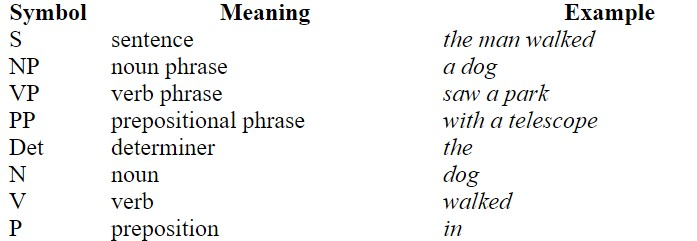

A *production* like VP -> V NP | V NP PP has a disjunction on the righthand side, shown by the | and is an abbreviation for the two productions VP -> V NP and VP -> V NP PP.

In [4]:
simple_cfg.productions()

[S -> NP VP,
 NP -> Det N,
 NP -> Det N PP,
 NP -> 'John',
 NP -> 'Mary',
 NP -> 'Bob',
 NP -> 'I',
 VP -> V NP,
 VP -> VP PP,
 PP -> P NP,
 V -> 'saw',
 V -> 'ate',
 V -> 'walked',
 V -> 'shot',
 Det -> 'a',
 Det -> 'an',
 Det -> 'the',
 Det -> 'my',
 N -> 'man',
 N -> 'dog',
 N -> 'cat',
 N -> 'telescope',
 N -> 'park',
 N -> 'elephant',
 N -> 'pajamas',
 P -> 'in',
 P -> 'on',
 P -> 'by',
 P -> 'with']

In [5]:
for p in simple_cfg.productions():
    print(p.lhs(), p.rhs())

S (NP, VP)
NP (Det, N)
NP (Det, N, PP)
NP ('John',)
NP ('Mary',)
NP ('Bob',)
NP ('I',)
VP (V, NP)
VP (VP, PP)
PP (P, NP)
V ('saw',)
V ('ate',)
V ('walked',)
V ('shot',)
Det ('a',)
Det ('an',)
Det ('the',)
Det ('my',)
N ('man',)
N ('dog',)
N ('cat',)
N ('telescope',)
N ('park',)
N ('elephant',)
N ('pajamas',)
P ('in',)
P ('on',)
P ('by',)
P ('with',)


In [6]:
simple_cfg.productions(rhs='elephant')

[N -> 'elephant']

In [7]:
# Utility function
def parse(parser, sentence):
    for tree in parser.parse(sentence):
        print(tree)
        print()
        tree.pretty_print() # requires python<=3.7.9
        print('-'*70)

In [8]:
# Parsing
sentence = "Mary saw Bob".split()
simple_parser = nltk.ChartParser(simple_cfg)
parse(simple_parser, sentence)

(S (NP Mary) (VP (V saw) (NP Bob)))

      S         
  ____|___       
 |        VP    
 |     ___|___   
 NP   V       NP
 |    |       |  
Mary saw     Bob

----------------------------------------------------------------------



If we parse the sentence $$\texttt{The dog saw a man in the park.}$$ using this grammar, we end up with two trees as shown below.

In [9]:
sentence = "the dog saw a man in the park".split()
parse(simple_parser, sentence)

(S
  (NP (Det the) (N dog))
  (VP
    (VP (V saw) (NP (Det a) (N man)))
    (PP (P in) (NP (Det the) (N park)))))

                 S                          
      ___________|_______                    
     |                   VP                 
     |            _______|_______            
     |           VP              PP         
     |        ___|___         ___|___        
     NP      |       NP      |       NP     
  ___|___    |    ___|___    |    ___|___    
Det      N   V  Det      N   P  Det      N  
 |       |   |   |       |   |   |       |   
the     dog saw  a      man  in the     park

----------------------------------------------------------------------
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))

                 S                      
      ___________|___                    
     |               VP                 
     |        _______|___                
     |       |           NP          

The sentence is ***structurally ambiguous***, since our *grammar* licenses two trees for this sentence. This is another example of ***prepositional phrase attachment ambiguity***. 

Lecture example.

$$\texttt{I shot an elephant in my pajamas.}$$

This grammar permits the sentence to be analyzed in two ways, depending on whether the prepositional phrase in my pajamas describes *the elephant* or *the shooting event*.

In [10]:
sentence = 'I shot an elephant in my pajamas'.split()
parse(simple_parser, sentence)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))

     S                                       
  ___|______________                          
 |                  VP                       
 |         _________|__________               
 |        VP                   PP            
 |    ____|___              ___|___           
 |   |        NP           |       NP        
 |   |     ___|_____       |    ___|_____     
 NP  V   Det        N      P  Det        N   
 |   |    |         |      |   |         |    
 I  shot  an     elephant  in  my     pajamas

----------------------------------------------------------------------
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))

     S                                   
  ___|__________                          
 |              VP                       
 |    __________|______                   
 |   |                 NP           

#### Issues:
- NLTK does not have a CKY algorithm based parser
- Even its CNF conversion function [`chomsky_normal_form`](https://github.com/nltk/nltk/issues/1884) has a bug

---
### Recursion in Syntactic Structure

A grammar is said to be **recursive** if a category occurring on the left hand side of a production also appears on the righthand side of a production, as illustrated below. 

The production Nom -> Adj Nom (where Nom is the category of nominals) involves direct recursion on the category Nom, whereas indirect recursion on S arises from the combination of two productions, namely S -> NP VP and VP -> V S.

To see how recursion arises from this grammar, consider the following trees. The first involves nested nominal phrases, while the next tree contains nested sentences.

In [11]:
rc_grammar = nltk.CFG.fromstring("""
  S  -> NP VP
  NP -> Det Nom | PropN
  Nom -> Adj Nom | N
  VP -> V Adj | V NP | V S | V NP PP
  PP -> P NP
  PropN -> 'Buster' | 'Chatterer' | 'Joe'
  Det -> 'the' | 'a'
  N -> 'bear' | 'squirrel' | 'tree' | 'fish' | 'log'
  Adj  -> 'angry' | 'frightened' |  'little' | 'tall'
  V ->  'chased'  | 'saw' | 'said' | 'thought' | 'was' | 'put'
  P -> 'on'
  """)

In [12]:
sent1 = 'the angry bear chased the frightened little squirrel'.split()
sent2 = 'Chatterer said Buster thought the tree was tall'.split()

rc_parser = nltk.ChartParser(rc_grammar)
parse(rc_parser, sent1)
parse(rc_parser, sent2)

(S
  (NP (Det the) (Nom (Adj angry) (Nom (N bear))))
  (VP
    (V chased)
    (NP
      (Det the)
      (Nom (Adj frightened) (Nom (Adj little) (Nom (N squirrel)))))))

                     S                                          
       ______________|____________                               
      |                           VP                            
      |               ____________|_______                       
      |              |                    NP                    
      |              |      ______________|____                  
      NP             |     |                  Nom               
  ____|____          |     |       ____________|_____            
 |        Nom        |     |      |                 Nom         
 |     ____|___      |     |      |             _____|_____      
 |    |       Nom    |     |      |            |          Nom   
 |    |        |     |     |      |            |           |     
Det  Adj       N     V    Det    Adj         

We've only illustrated two levels of recursion here, but there's no upper limit on the depth. You can experiment with parsing sentences that involve more deeply nested structures.

---
### Cocke-Kasami-Younger(CKY) Algorithm
As discussed in the lecture, CKY Parsing is an efficient dynamic programming based approach under two assumptions: 

- Only binary productions in Chomsky Normal Form (CNF)
- CFG constituents are contiguous spans of words

For this CKY implementation, a **Well-Formed Substring Table (WFST)** is used as the data structure (*chart*) to store intermediate results and reuse them when necessary. An $n × n$ matrix is created as a list of lists in Python, where $n$ is the number of tokens, and initialized with the lexical categories of each token in the `init_wfst()` function. A utility function `display()` is used to pretty-print the *WFST*. 

In [13]:
# This function creates the matrix and fills the diagonal elements
def init_wfst(tokens, grammar):
    numtokens = len(tokens)
    wfst = [[None for i in range(numtokens+1)] for j in range(numtokens+1)]
    for i in range(numtokens):
        productions = grammar.productions(rhs=tokens[i])
        wfst[i][i+1] = productions[0].lhs()
    return wfst

# This function fills the rest of the elements in the matrix
def complete_wfst(wfst, tokens, grammar, trace=False):
    index = dict((p.rhs(), p.lhs()) for p in grammar.productions())
    numtokens = len(tokens)
    for span in range(2, numtokens+1):
        for start in range(numtokens+1-span):
            end = start + span
            for mid in range(start+1, end):
                nt1, nt2 = wfst[start][mid], wfst[mid][end]
                if nt1 and nt2 and (nt1,nt2) in index:
                    wfst[start][end] = index[(nt1,nt2)]
                    if trace:
                        print("[%s] %3s [%s] %3s [%s] ==> [%s] %3s [%s]" % \
                        (start, nt1, mid, nt2, end, start, index[(nt1,nt2)], end))
    return wfst

# Utility function
def display(wfst, tokens):
    print('\nWFST ' + ' '.join(("%-4d" % i) for i in range(1, len(wfst))))
    for i in range(len(wfst)-1):
        print("%d   " % i, end=" ")
        for j in range(1, len(wfst)):
            print("%-4s" % (wfst[i][j] or '.'), end=" ")
        print()

In [14]:
# Grammar definition
atis_grammar = nltk.CFG.fromstring("""
S -> NP VP
S -> Aux NP VP
S -> VP
NP -> Pro
Pro -> 'I' | 'she' | 'me'
NP -> Proper-Noun
Proper-Noun -> 'TWA' | 'Houston'
NP -> Det Nom
Det -> 'the' | 'a'
Nom -> Noun
Noun -> 'book' | 'flight' | 'meal' | 'money'
Nom -> Nom Noun
Nom -> Nom PP
VP -> Verb
Verb -> 'book' | 'include' | 'prefer'
VP -> Verb NP
VP -> Verb NP PP
VP -> Verb PP
VP -> VP PP
PP -> Prep NP
Prep -> 'through'
""")

In [15]:
atis_grammar.productions()

[S -> NP VP,
 S -> Aux NP VP,
 S -> VP,
 NP -> Pro,
 Pro -> 'I',
 Pro -> 'she',
 Pro -> 'me',
 NP -> Proper-Noun,
 Proper-Noun -> 'TWA',
 Proper-Noun -> 'Houston',
 NP -> Det Nom,
 Det -> 'the',
 Det -> 'a',
 Nom -> Noun,
 Noun -> 'book',
 Noun -> 'flight',
 Noun -> 'meal',
 Noun -> 'money',
 Nom -> Nom Noun,
 Nom -> Nom PP,
 VP -> Verb,
 Verb -> 'book',
 Verb -> 'include',
 Verb -> 'prefer',
 VP -> Verb NP,
 VP -> Verb NP PP,
 VP -> Verb PP,
 VP -> VP PP,
 PP -> Prep NP,
 Prep -> 'through']

In [16]:
# Not as expected
atis_grammar.chomsky_normal_form().productions()

[S -> NP VP,
 S -> Aux S@$@Aux,
 S@$@Aux -> NP VP,
 Pro -> 'I',
 Pro -> 'she',
 Pro -> 'me',
 Proper-Noun -> 'TWA',
 Proper-Noun -> 'Houston',
 NP -> Det Nom,
 Det -> 'the',
 Det -> 'a',
 Noun -> 'book',
 Noun -> 'flight',
 Noun -> 'meal',
 Noun -> 'money',
 Nom -> Nom Noun,
 Nom -> Nom PP,
 Verb -> 'book',
 Verb -> 'include',
 Verb -> 'prefer',
 VP -> Verb NP,
 VP -> Verb VP@$@Verb,
 VP@$@Verb -> NP PP,
 VP -> Verb PP,
 VP -> VP PP,
 PP -> Prep NP,
 Prep -> 'through',
 S -> Verb NP,
 S -> Verb VP@$@Verb,
 S -> Verb PP,
 S -> VP PP,
 NP -> 'I',
 NP -> 'she',
 NP -> 'me',
 NP -> 'TWA',
 NP -> 'Houston',
 Nom -> 'book',
 Nom -> 'flight',
 Nom -> 'meal',
 Nom -> 'money',
 VP -> 'book',
 VP -> 'include',
 VP -> 'prefer',
 S -> 'book',
 S -> 'include',
 S -> 'prefer']

In [17]:
# Expected CNF
atis_grammar = nltk.CFG.fromstring("""
S -> NP VP
S -> X1 VP
X1 -> Aux NP
S -> 'book' | 'include' | 'prefer'
S -> Verb NP
S -> X2 PP
S -> Verb PP
S -> VP PP
NP -> 'I' | 'she' | 'me'
NP -> 'TWA' | 'Houston'
NP -> Det Nom
Det -> 'the' | 'a'
Nom -> 'book' | 'flight' | 'meal' | 'money'
Nom -> Nom Noun
Nom -> Nom PP
VP -> 'book' | 'include' | 'prefer'
VP -> Verb NP
VP -> X2 PP
X2 -> Verb NP
VP -> Verb PP
VP -> VP PP
PP -> Prep NP
Prep -> 'through'
""")

In [18]:
atis_grammar.productions()

[S -> NP VP,
 S -> X1 VP,
 X1 -> Aux NP,
 S -> 'book',
 S -> 'include',
 S -> 'prefer',
 S -> Verb NP,
 S -> X2 PP,
 S -> Verb PP,
 S -> VP PP,
 NP -> 'I',
 NP -> 'she',
 NP -> 'me',
 NP -> 'TWA',
 NP -> 'Houston',
 NP -> Det Nom,
 Det -> 'the',
 Det -> 'a',
 Nom -> 'book',
 Nom -> 'flight',
 Nom -> 'meal',
 Nom -> 'money',
 Nom -> Nom Noun,
 Nom -> Nom PP,
 VP -> 'book',
 VP -> 'include',
 VP -> 'prefer',
 VP -> Verb NP,
 VP -> X2 PP,
 X2 -> Verb NP,
 VP -> Verb PP,
 VP -> VP PP,
 PP -> Prep NP,
 Prep -> 'through']

In [19]:
index = dict((p.rhs(), p.lhs()) for p in atis_grammar.productions())
index

{('Houston',): NP,
 ('I',): NP,
 ('TWA',): NP,
 ('a',): Det,
 ('book',): VP,
 ('flight',): Nom,
 ('include',): VP,
 ('me',): NP,
 ('meal',): Nom,
 ('money',): Nom,
 ('prefer',): VP,
 ('she',): NP,
 ('the',): Det,
 ('through',): Prep,
 (Aux, NP): X1,
 (Det, Nom): NP,
 (NP, VP): S,
 (Nom, Noun): Nom,
 (Nom, PP): Nom,
 (Prep, NP): PP,
 (VP, PP): VP,
 (Verb, NP): X2,
 (Verb, PP): VP,
 (X1, VP): S,
 (X2, PP): VP}

In [20]:
tokens = "book the flight through Houston".split()
wfst0 = init_wfst(tokens, atis_grammar)
display(wfst0, tokens)


WFST 1    2    3    4    5   
0    S    .    .    .    .    
1    .    Det  .    .    .    
2    .    .    Nom  .    .    
3    .    .    .    Prep .    
4    .    .    .    .    NP   


In [21]:
wfst1 = complete_wfst(wfst0, tokens, atis_grammar)
display(wfst1, tokens)


WFST 1    2    3    4    5   
0    S    .    .    .    .    
1    .    Det  NP   .    NP   
2    .    .    Nom  .    Nom  
3    .    .    .    Prep PP   
4    .    .    .    .    NP   


By setting `trace` to $\texttt{True}$ when calling the function `complete_wfst()`, we see tracing output that shows the WFST being constructed.

In [22]:
 complete_wfst(wfst0, tokens, atis_grammar, trace=True)

[1] Det [2] Nom [3] ==> [1]  NP [3]
[3] Prep [4]  NP [5] ==> [3]  PP [5]
[2] Nom [3]  PP [5] ==> [2] Nom [5]
[1] Det [2] Nom [5] ==> [1]  NP [5]


[[None, S, None, None, None, None],
 [None, None, Det, NP, None, NP],
 [None, None, None, Nom, None, Nom],
 [None, None, None, None, Prep, PP],
 [None, None, None, None, None, NP],
 [None, None, None, None, None, None]]

In [23]:
tokens = 'I shot an elephant in my pajamas'.split()
wfst0 = init_wfst(tokens, simple_cfg)
wfst1 = complete_wfst(wfst0, tokens, simple_cfg)
display(wfst1, tokens)


WFST 1    2    3    4    5    6    7   
0    NP   .    .    S    .    .    S    
1    .    V    .    VP   .    .    VP   
2    .    .    Det  NP   .    .    .    
3    .    .    .    N    .    .    .    
4    .    .    .    .    P    .    PP   
5    .    .    .    .    .    Det  NP   
6    .    .    .    .    .    .    N    


In [24]:
complete_wfst(wfst0, tokens, simple_cfg, trace=True)

[2] Det [3]   N [4] ==> [2]  NP [4]
[5] Det [6]   N [7] ==> [5]  NP [7]
[1]   V [2]  NP [4] ==> [1]  VP [4]
[4]   P [5]  NP [7] ==> [4]  PP [7]
[0]  NP [1]  VP [4] ==> [0]   S [4]
[1]  VP [4]  PP [7] ==> [1]  VP [7]
[0]  NP [1]  VP [7] ==> [0]   S [7]


[[None, NP, None, None, S, None, None, S],
 [None, None, V, None, VP, None, None, VP],
 [None, None, None, Det, NP, None, None, None],
 [None, None, None, None, N, None, None, None],
 [None, None, None, None, None, P, None, PP],
 [None, None, None, None, None, None, Det, NP],
 [None, None, None, None, None, None, None, N],
 [None, None, None, None, None, None, None, None]]

#### Build Grammar for production usage using [NLTK data](https://www.nltk.org/data.html) and [`nltk.corpus`](http://www.nltk.org/api/nltk.corpus.html) module

In [25]:
from nltk.corpus import treebank
nltk.download('treebank')
t = treebank.parsed_sents('wsj_0001.mrg')[0]
print(t)

[nltk_data] Downloading package treebank to /root/nltk_data...


(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


[nltk_data]   Unzipping corpora/treebank.zip.


In [26]:
from nltk.corpus import indian
nltk.download('indian')
t = indian.sents()[0]
print(t)

[nltk_data] Downloading package indian to /root/nltk_data...


['মহিষের', 'সন্তান', ':', 'তোড়া', 'উপজাতি', '৷']


[nltk_data]   Unzipping corpora/indian.zip.


---
### Real-World Parsers
We have many state-of-the-art models for *Constituency Parsing*, few of them are available for production usage. List available at 
[NLP-progress: Constituency Parsing](http://nlpprogress.com/english/constituency_parsing.html).

- [StanfordCoreNLP](https://stanfordnlp.github.io/CoreNLP/parse.html): Stanford's Java based NLP toolkit.
- [Kitaev and Klein](https://github.com/nikitakit/self-attentive-parser): [Berkeley Neural Parser](https://parser.kitaev.io). Can be used with NLTK, spaCy also has a plug-in for this.

In [39]:
#!pip install cython
#!pip install tensorflow==1.15 # for benepar, also requires python<=3.7.9
#!pip install benepar

In [41]:
import benepar
benepar.download('benepar_en3')

[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Unzipping models/benepar_en3.zip.


True

In [42]:
# NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

cf.
> `punkt` [NLTK Sentence Tokenizer](https://www.nltk.org/_modules/nltk/tokenize/punkt.html)

In [43]:
# Create parser object
bparser = benepar.Parser("benepar_en3")
tree = bparser.parse("Short cuts make long delays.")
print(tree)
print()
tree.pretty_print()
print('-'*70)

(TOP
  (S
    (NP (JJ Short) (NNS cuts))
    (VP (VBP make) (NP (JJ long) (NNS delays)))
    (. .)))

               TOP                     
                |                       
                S                      
        ________|____________________   
       |             VP              | 
       |         ____|____           |  
       NP       |         NP         | 
   ____|___     |     ____|____      |  
  JJ      NNS  VBP   JJ       NNS    . 
  |        |    |    |         |     |  
Short     cuts make long     delays  . 

----------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


In [44]:
# Parse for PP-Attachment Ambiguity
tree = bparser.parse(sentence)
print(tree)
print()
tree.pretty_print()
print('-'*70)

(TOP
  (S
    (NP (PRP I))
    (VP
      (VBD shot)
      (NP (DT an) (NN elephant))
      (PP (IN in) (NP (PRP$ my) (NNS pajamas))))))

    TOP                                       
     |                                         
     S                                        
  ___|______________                           
 |                  VP                        
 |    ______________|__________                
 |   |        |                PP             
 |   |        |             ___|____           
 NP  |        NP           |        NP        
 |   |     ___|_____       |    ____|_____     
PRP VBD   DT        NN     IN PRP$       NNS  
 |   |    |         |      |   |          |    
 I  shot  an     elephant  in  my      pajamas

----------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


In [45]:
# Parse for CKY example
tokens = "book the flight through Houston".split()
tree = bparser.parse(tokens)
print(tree)
print()
tree.pretty_print()
print('-'*70)

(TOP
  (VP
    (VB book)
    (NP
      (NP (DT the) (NN flight))
      (PP (IN through) (NP (NNP Houston))))))

              TOP                          
               |                            
               VP                          
  _____________|_____                       
 |                   NP                    
 |         __________|___________           
 |        |                      PP        
 |        |                 _____|_____     
 |        NP               |           NP  
 |     ___|____            |           |    
 VB   DT       NN          IN         NNP  
 |    |        |           |           |    
book the     flight     through     Houston

----------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


In [46]:
# spaCy
import spacy
nlp = spacy.load("en_core_web_sm")
from benepar.spacy_plugin import BeneparComponent

/usr/local/lib/python3.7/dist-packages/benepar/spacy_plugin.py:12: FutureWarning: BeneparComponent and NonConstituentException have been moved to the benepar module. Use `from benepar import BeneparComponent, NonConstituentException` instead of benepar.spacy_plugin. The benepar.spacy_plugin namespace is deprecated and will be removed in a future version.
  FutureWarning,


cf.
> $\texttt{en_core_web_sm}$ one of the [pretrained statiscal models for English](https://spacy.io/models/en) in spaCy

In [48]:
# Generate document
nlp.add_pipe(BeneparComponent('benepar_en3'))
doc = nlp("The time for action is now. It's never too late to do something.")
doc

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


The time for action is now. It's never too late to do something.

In [49]:
# Get parse
for sent in list(doc.sents):
    print(sent)
    print(sent._.parse_string)
    print(list(sent._.children))
    print('-'*70)

The time for action is now.
(S (NP (NP (DT The) (NN time)) (PP (IN for) (NP (NN action)))) (VP (VBZ is) (ADVP (RB now))) (. .))
[The time for action, is now, .]
----------------------------------------------------------------------
It's never too late to do something.
(S (NP (PRP It)) (VP (VBZ 's) (ADVP (RB never)) (ADJP (RB too) (JJ late) (S (VP (TO to) (VP (VB do) (NP (NN something))))))) (. .))
[It, 's never too late to do something, .]
----------------------------------------------------------------------


In [50]:
sent1 = list(doc.sents)[0]
c1 = list(sent1._.children)[0]
print(list(c1._.children))
print(list(list(c1._.children)[0]._.children))
print(list(list(list(c1._.children)[0]._.children)[0]._.children))

[The time, for action]
[The, time]
[]


In [51]:
doc = nlp( 'I shot an elephant in my pajamas')
sent = list(doc.sents)
sent[0]._.parse_string

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


'(S (NP (PRP I)) (VP (VBD shot) (NP (DT an) (NN elephant)) (PP (IN in) (NP (PRP$ my) (NNS pajamas)))))'

In [52]:
doc = nlp( "book the flight through Houston")
sent = list(doc.sents)
sent[0]._.parse_string

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


'(VP (VB book) (NP (NP (DT the) (NN flight)) (PP (IN through) (NP (NNP Houston)))))'

---
## References

- Daniel Jurafsky & James H. Martin. *Speech and Language Processing.* Draft of October 2, 2019.
- Steven Bird, Ewan Klein, and Edward Loper. [*Natural Language Processing With Python*](http://www.nltk.org/book/). O’Reilly, 2009.